In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from keras import layers, regularizers
from keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [6]:
def my_model():
  inputs = keras.Input(shape=(32, 32, 3))
  x = layers.Conv2D(32, (3, 3), 1, padding='same', kernel_regularizer=regularizers.l2(0.01))(inputs)
  x = layers.BatchNormalization()(x)
  x = keras.activations.relu(x)
  x = layers.MaxPooling2D()(x)
  x = layers.Conv2D(64, (3, 3), 1, padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
  x = layers.BatchNormalization()(x)
  x = keras.activations.relu(x)
  x = layers.MaxPooling2D()(x)
  x = layers.Conv2D(128, (3, 3), 1, padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
  x = layers.BatchNormalization()(x)
  x = keras.activations.relu(x)
  x = layers.Flatten()(x)
  x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
  x = layers.Dropout(0.05)(x)
  outputs = layers.Dense(10, activation='softmax')(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model

model = my_model()

model.compile(loss='SparseCategoricalCrossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=['Accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)

Epoch 1/10
782/782 - 6s - loss: 2.6949 - Accuracy: 0.5340 - 6s/epoch - 8ms/step
Epoch 2/10
782/782 - 5s - loss: 1.5773 - Accuracy: 0.6608 - 5s/epoch - 6ms/step
Epoch 3/10
782/782 - 5s - loss: 1.2674 - Accuracy: 0.7014 - 5s/epoch - 6ms/step
Epoch 4/10
782/782 - 6s - loss: 1.1300 - Accuracy: 0.7205 - 6s/epoch - 7ms/step
Epoch 5/10
782/782 - 5s - loss: 1.0495 - Accuracy: 0.7372 - 5s/epoch - 6ms/step
Epoch 6/10
782/782 - 4s - loss: 0.9989 - Accuracy: 0.7493 - 4s/epoch - 5ms/step
Epoch 7/10
782/782 - 6s - loss: 0.9608 - Accuracy: 0.7598 - 6s/epoch - 8ms/step
Epoch 8/10
782/782 - 5s - loss: 0.9334 - Accuracy: 0.7680 - 5s/epoch - 7ms/step
Epoch 9/10
782/782 - 6s - loss: 0.9019 - Accuracy: 0.7780 - 6s/epoch - 7ms/step
Epoch 10/10
782/782 - 4s - loss: 0.8880 - Accuracy: 0.7841 - 4s/epoch - 5ms/step


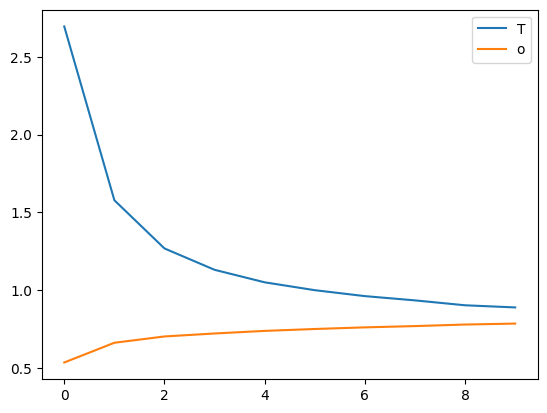

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['Accuracy'], label='Accuracy')
plt.legend("Top Left")
plt.show()

In [5]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

157/157 - 1s - loss: 1.1304 - Accuracy: 0.7003 - 927ms/epoch - 6ms/step


[1.130410075187683, 0.7002999782562256]